In [170]:
import os
print("Mevcut dizindeki dosyalar:", os.listdir())

Mevcut dizindeki dosyalar: ['app.ipynb', 'catboost_info', 'gender_submission.csv', 'test.csv', 'train.csv']


In [171]:
import pandas as pd # data processing

training = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [172]:
import numpy as np # linear algebra
training['train_test'] = 1
test['train_test'] = 0
test['Survived'] = np.nan 
all_data = pd.concat([training,test])

In [173]:
import matplotlib.pyplot as plt
plt.show() 

In [174]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  train_test   891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [175]:
training.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,train_test
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.0
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,1.0
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429,0.0
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,1.0
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400,1.0
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200,1.0
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000,1.0
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.0


In [176]:
training.describe().columns #separate numeric columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'train_test'],
      dtype='object')

In [177]:
#numeric and categorical values
df_num = training[['Age','SibSp','Parch','Fare']]
df_cat = training[['Survived','Pclass','Sex','Ticket','Cabin','Embarked']]

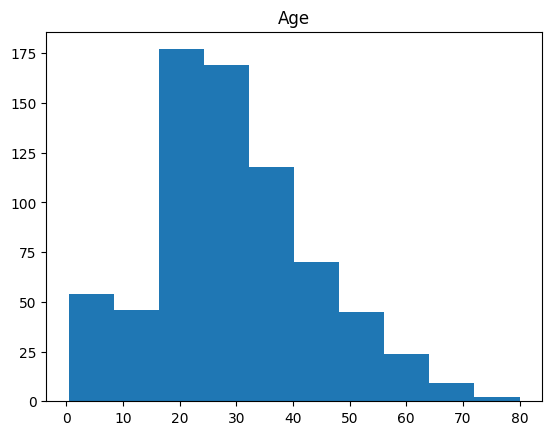

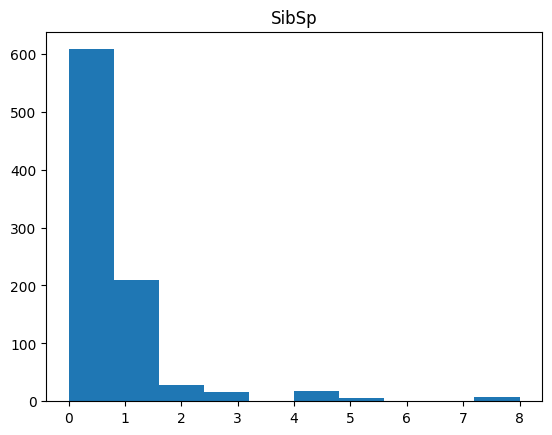

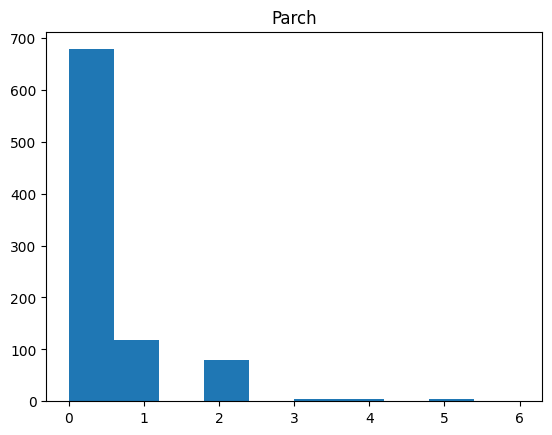

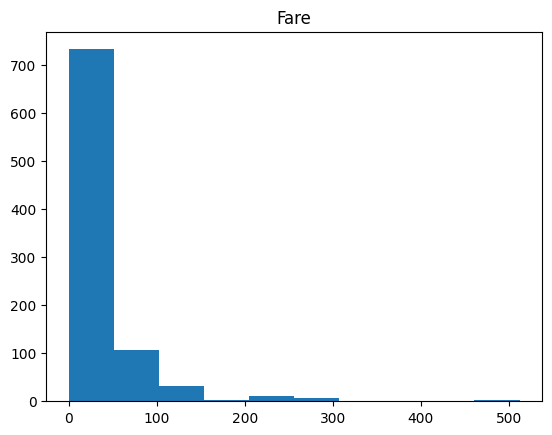

In [178]:
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

    #age normal dağılım a yakın kalanları düzeltmek lazım


            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<Axes: >

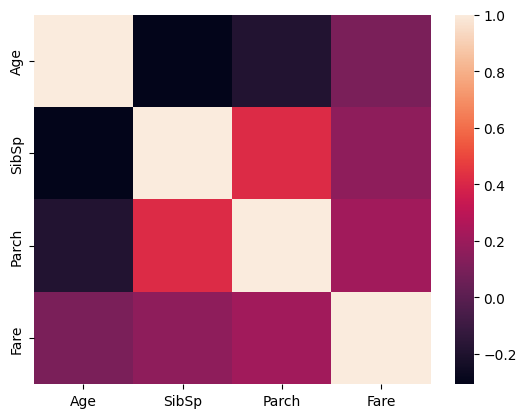

In [179]:
import seaborn as sns
print(df_num.corr())
sns.heatmap(df_num.corr())

#correlation matrix ve heatmap gösteriliyor 
#Bu tablo ve grafik, sayısal değişkenler arasındaki ilişkinin gücünü ve yönünü anlamaya yardımcı olur.

In [180]:
#Age - SibSp:  -0.3 Negatif korelasyon.
#Parch - SibSp: 0.41 Aileler birlikte geziyor. (pozitif corr)
#Parch - Fare:   0.21 Zayıf pozitif, ailece gezenler yüksek fiyat öder.
#Fare - Age: 0.09 zayıf pozitif, yaşlılar yüksek fiyat ödeyebilir.



In [181]:
# compare survival rate  Age, SibSp, Parch, and Fare 
pd.pivot_table(training, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [182]:
#ortalama 28.34 yaşındakiler,
#ortalama 48.39 ödeyenler ve
#ailen varasa ve cocuksan 0.46 yaşama olasılığın yüksek
#kardeşlerin varsa  0.55 yaşama olasılığın düşüyor

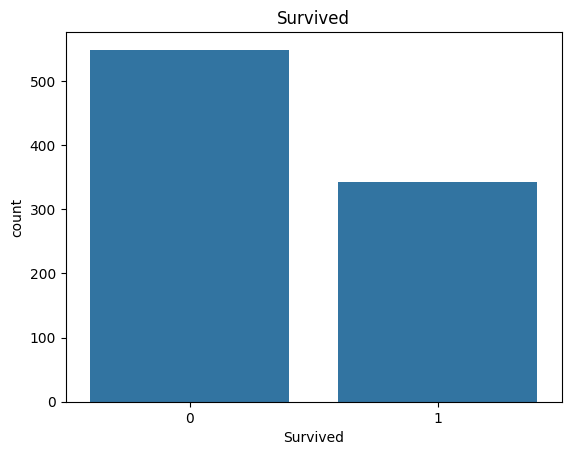

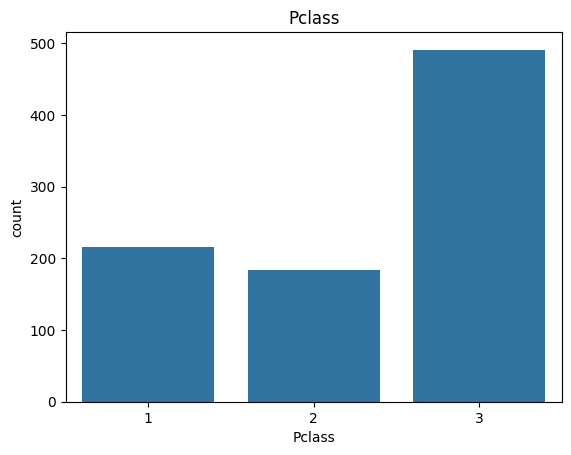

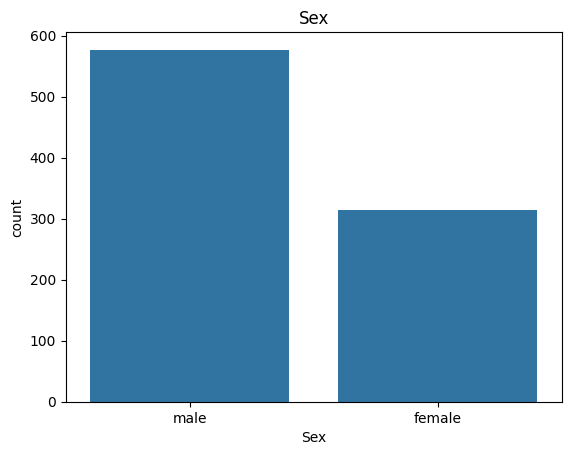

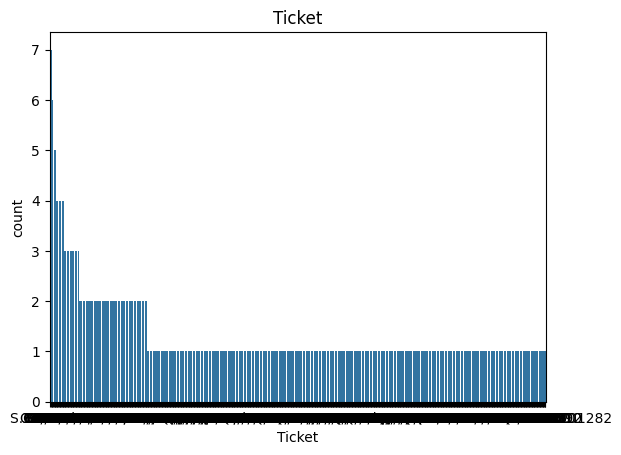

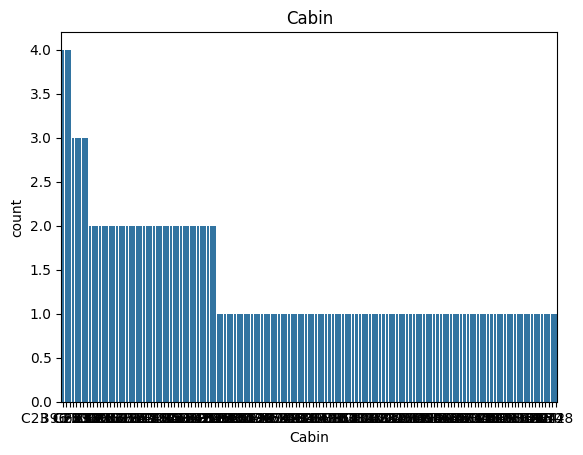

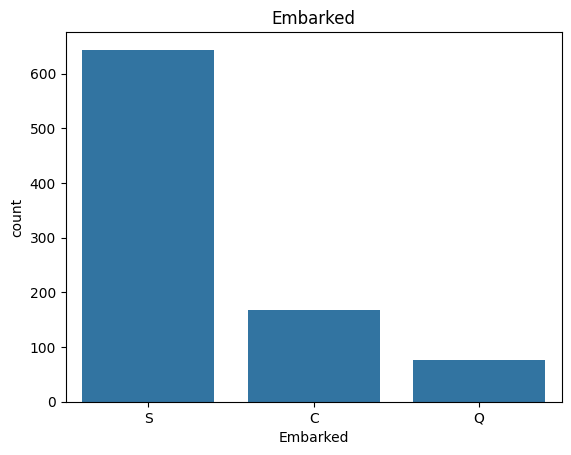

In [183]:
for i in df_cat.columns:
    sns.barplot(x=df_cat[i].value_counts().index, 
                y=df_cat[i].value_counts()).set_title(i)
    plt.show()
    

In [184]:
#cabin ve ticket yardımcı olmadı
# genellikle 3. sınıf bilet var
# Southamptondan binişler fazla
# gemi erkek ağrılıklı

In [185]:
#corr ,heat mape benzer birşey yapıyoruz anlamlandırmak için
#cıkan verileri Survived ile karşılastırıyoruz .Pclass,Sex,Embarked


print(pd.pivot_table(training, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(training, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [186]:
# 1. sınıf biletliler alt classlara gore hayatta kalma egiliminde (Rich Survived)

#kadınlar erkeklere gore hayatta kalma egiliminde (Women and children first politikası)
#binişlerin nereden olmasıyla ilgili belirli anlamlandırabilinecek birşey yok
##

In [187]:
#Kabin bilgisi olmayan yolcuların hayatta kalma oranı daha düşük mü?
#nan olanlarrı 0 yaparak sınıflandırıyorum
#Kabinlerin filikalara yakınlığına da bakılabilir.
df_cat.Cabin
training['cabin0'] = training.Cabin.apply(lambda x: 0 if pd.isna(x) else 1)
training['cabin0'].value_counts()

cabin0
0    687
1    204
Name: count, dtype: int64

In [188]:
pd.pivot_table(training, index = 'Survived', columns = 'cabin0', values = 'Ticket' ,aggfunc ='count')

cabin0,0,1
Survived,,
0,481,68
1,206,136


In [189]:
# person's title 
training.Name.head(50)
training['name_title'] = training.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())
training['name_title'].value_counts()

name_title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Mlle              2
Major             2
Ms                1
Mme               1
Don               1
Lady              1
Sir               1
Capt              1
the Countess      1
Jonkheer          1
Name: count, dtype: int64

In [190]:
all_data['cabin0'] = all_data.Cabin.apply(lambda x: 0 if pd.isna(x) else len(x.split(' ')))
all_data['name_title'] = all_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

#all_data.Age = all_data.Age.fillna(training.Age.mean())         #normal dağılım oldugu için ortalama
all_data.Fare = all_data.Fare.fillna(training.Fare.median())    #normal dağılım değil (sağa çarpık) ortadaki değeri alıp kullanmak daha mantıklı .
                                                                #çok lüks kabinlerin ,fazla yüksek ücretleri, ortalamayı şişiriyor.(outlier)
all_data.dropna(subset=['Embarked'],inplace = True)             #Embarked dropna .Binişler cok önemli değil gibi

In [191]:
training.groupby('Pclass')['Age'].mean()


Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [192]:
#normal dağılım oldugu için ortalama alıonır ama her classın kendi ortalaması yazılır
train = pd.read_csv('train.csv') 
all_data.Age= train['Age'] = train.groupby('Pclass')['Age'].transform(
    lambda x: x.fillna(x.mean())
)
all_data = train.copy() 
print(train)





     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex       Age  \
0                              Braund, Mr. Owen Harris    male  22.00000   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.00000   
2                               Heikkinen, Miss. Laina  female  26.00000   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.00000   
4                             Allen, Mr. William Henry    male  35.00000   
..                                                 ...     ...       ...   
886        

In [193]:
#Pclass kategorik değere ,etikete, dönüştürülür (string yaptık int olsa matematiksel ilişki var sanabilir)
#all_data.Pclass = all_data.Pclass.astype(str) 
# train - test e böldük
#X_train = all_dummies[all_dummies.train_test == 1].drop(['train_test'], axis =1)
#X_test = all_dummies[all_dummies.train_test == 0].drop(['train_test'], axis =1)

#y_train = all_data[all_data.train_test==1].Survived
#y_train.shape

<Axes: >

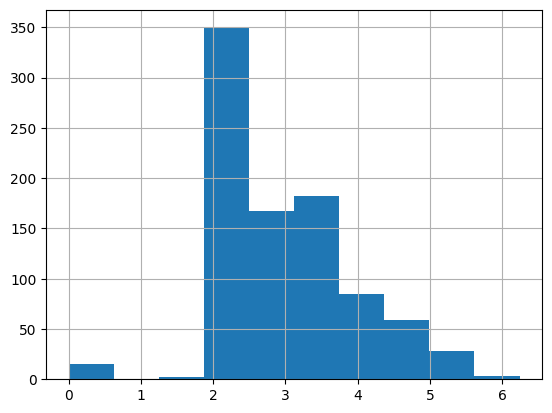

In [194]:
#Sağa çarpıklığı düzeltmek için genellikle logaritmik dönüşüm kullanılır (normalizasyon)
#Log dönüşümü büyük değerleri "bastırır", küçüklerle arasındaki farkı daha dengeli hale getirir.
#Outlier'ların model üzerinde fazlaetkili olmasını önler.
all_data['norm_fare'] = np.log(all_data.Fare+1)
all_data['norm_fare'].hist()
#PS:pek düzelmedi

In [195]:
#from sklearn.linear_model import LogisticRegression
#lr = LogisticRegression(max_iter = 2000)
#cv = cross_val_score(lr,X_train,y_train,cv=5)
#print(cv)
#print(cv.mean())

#lr = LogisticRegression()
#param_grid = {'max_iter' : [2000],
#              'penalty' : ['l1', 'l2'],
#              'C' : np.logspace(-4, 4, 20),
#              'solver' : ['liblinear']}

#clf_lr = GridSearchCV(lr, param_grid = param_grid, cv = 5, verbose = True, n_jobs = -1)

In [196]:
#Hem sayısal (numeric) hem de kategorik (categorical) özelliklerin bir arada olduğu veri setlerinde kullanılabilecek en mantıklı modellerden biri
#CatBoost muş preprosesing de gerektirmiyormuş.

import pandas as pd

# Verileri yükle
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

# Kontrollü sütun silme işlemi
def safe_drop(df, columns):
    return df.drop(columns=[col for col in columns if col in df.columns], axis=1)

train = safe_drop(train, ['PassengerId', 'Name', 'Ticket', 'Cabin'])
test = safe_drop(test, ['PassengerId', 'Name', 'Ticket', 'Cabin'])

# Kategorik değişkenler
cat_features = [col for col in ['Pclass', 'Sex', 'Embarked'] if col in train.columns]

# Eksik değerleri doldur
for df in [train, test]:
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)
    if 'Embarked' in df.columns:
        df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# Model eğitimi (CatBoost)
from catboost import CatBoostClassifier

model = CatBoostClassifier(
    iterations=1000,
    cat_features=cat_features,
    verbose=100
)

X_train = train.drop('Survived', axis=1)
y_train = train['Survived']

model.fit(X_train, y_train)

C:\Users\Saadet\AppData\Local\Temp\ipykernel_16832\3983748972.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(), inplace=True)
C:\Users\Saadet\AppData\Local\Temp\ipykernel_16832\3983748972.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

Learning rate set to 0.009807
0:	learn: 0.6892511	total: 15.8ms	remaining: 15.8s
100:	learn: 0.4372635	total: 3.18s	remaining: 28.3s
200:	learn: 0.3897720	total: 6.78s	remaining: 26.9s
300:	learn: 0.3716807	total: 10.1s	remaining: 23.4s
400:	learn: 0.3585037	total: 13.2s	remaining: 19.8s
500:	learn: 0.3489687	total: 16.2s	remaining: 16.1s
600:	learn: 0.3406790	total: 19.1s	remaining: 12.7s
700:	learn: 0.3320913	total: 22.5s	remaining: 9.61s
800:	learn: 0.3241999	total: 25.9s	remaining: 6.43s
900:	learn: 0.3149024	total: 29.3s	remaining: 3.22s
999:	learn: 0.3058443	total: 32.9s	remaining: 0us


In [ ]:
import pandas as pd
from catboost import CatBoostClassifier

# 1. Verileri yükle
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
test_predictions = model.predict(test)
# Test PassengerId'lerini sakla
test_passenger_ids = test['PassengerId']

# 7. Sonuçları DataFrame'e dönüştür
results = pd.DataFrame({
    'PassengerId': test_passenger_ids,
    'Survived': test_predictions.astype(int)  # 0 ve 1 olarak integer'a çevir
})

# 8. Sonuçları CSV'ye kaydet
results.to_csv('titanic_predictions.csv', index=False)



# 9. Sonuçları ekranda göster
print("İlk 10 Tahmin Sonucu:")
print(results.head(10))
print("\nTahmin Dağılımı:")
print(results['Survived'].value_counts())

# Ek olarak: Test verisiyle birlikte tahminleri göster
test_with_predictions = test.copy()
test_with_predictions['Survived_Prediction'] = test_predictions
print("\nTest Verisi ve Tahminler (İlk 10):")
print(test_with_predictions.head(10))